In [ ]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print("Hello Colab!")

Hello Colab!


In [ ]:
# For better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Pandas display settings to show all columns in one line
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', None)         # Don't wrap to next line
pd.set_option('display.max_colwidth', None)  # Show full content in each cell

In [ ]:
#  Load dataset
df = pd.read_csv("penguins.csv")

In [ ]:
# Basic exploration
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Shape of Dataset ---")
print(df.shape)

print("\n--- Data Info ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())


--- First 5 Rows ---
   id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   0  Adelie  Torgersen            39.1           18.7              181.0   
1   1  Adelie  Torgersen            39.5           17.4              186.0   
2   2  Adelie  Torgersen            40.3           18.0              195.0   
3   3  Adelie  Torgersen             NaN            NaN                NaN   
4   4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

--- Shape of Dataset ---
(344, 9)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species         

In [ ]:
# Missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [ ]:
#  Unique values in categorical columns
print("\n--- Unique Categorical Values ---")
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")


--- Unique Categorical Values ---
species: ['Adelie' 'Gentoo' 'Chinstrap']
island: ['Torgersen' 'Biscoe' 'Dream']
sex: ['male' 'female' nan]


In [ ]:
#  Data Cleaning
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Rows: {duplicates} ---")


--- Duplicate Rows: 0 ---


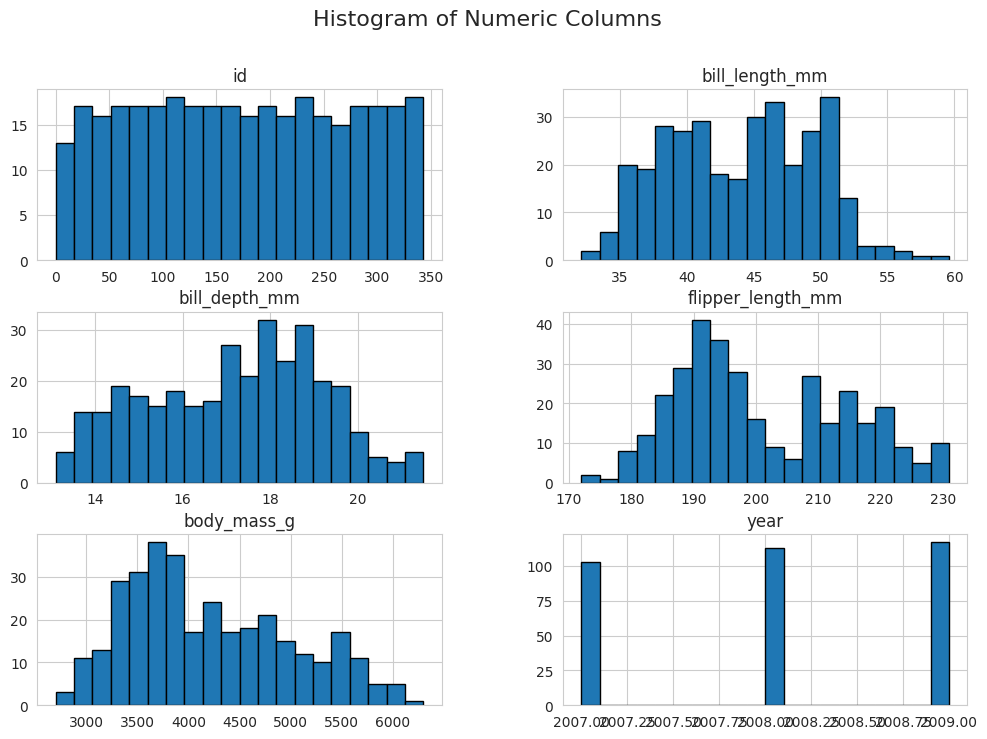

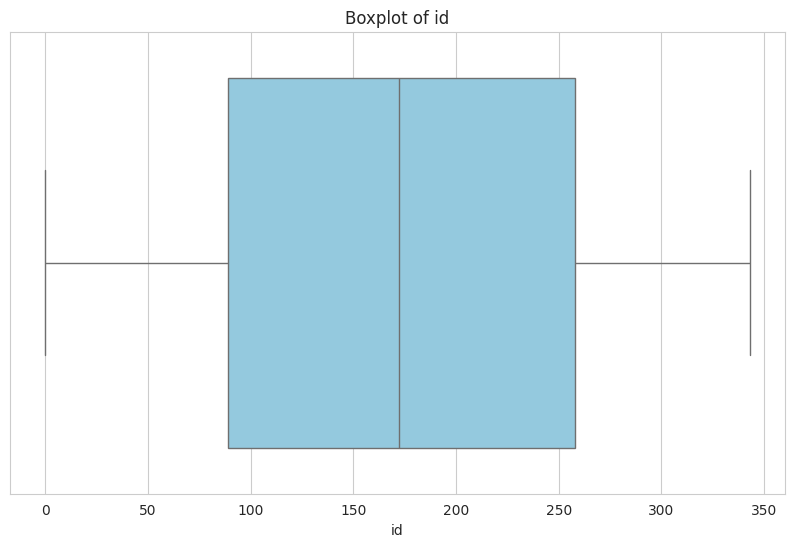

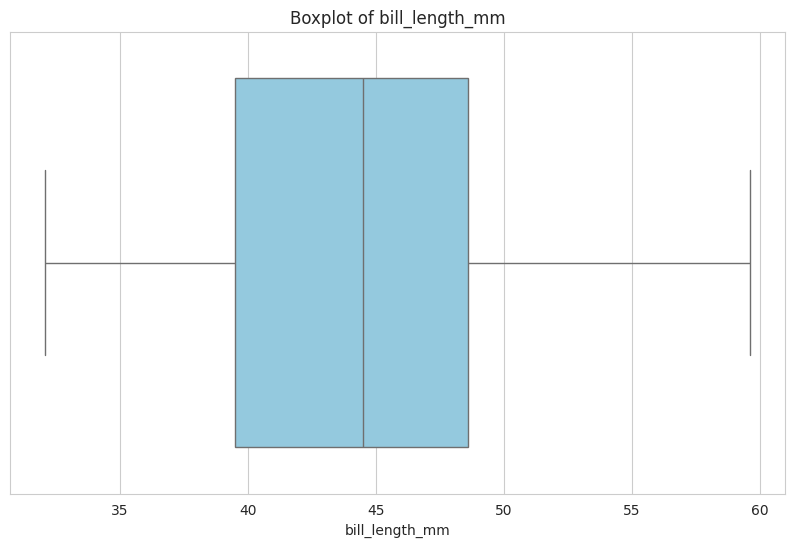

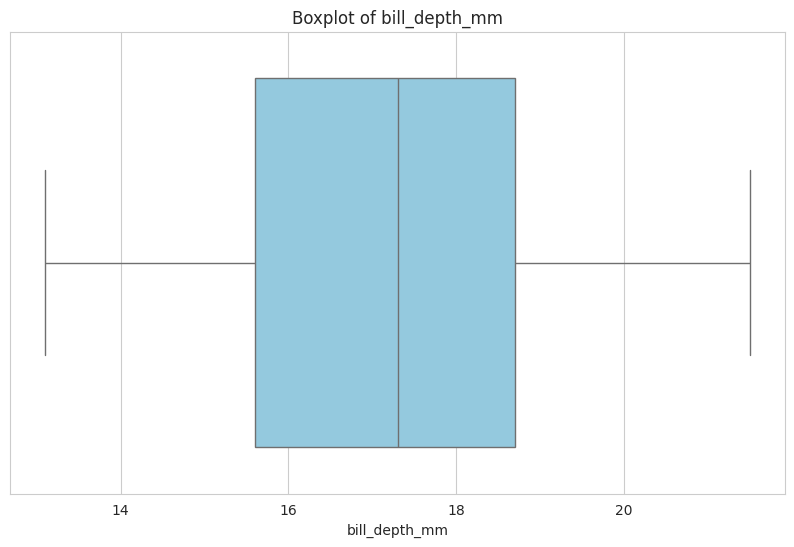

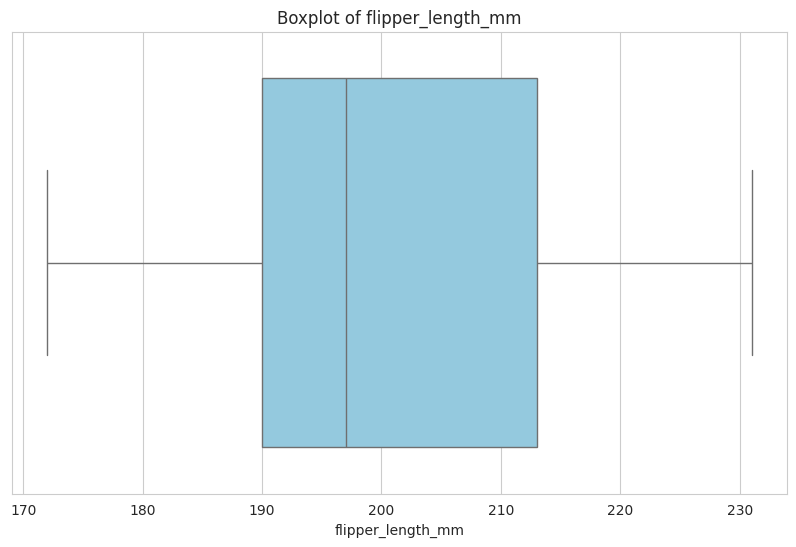

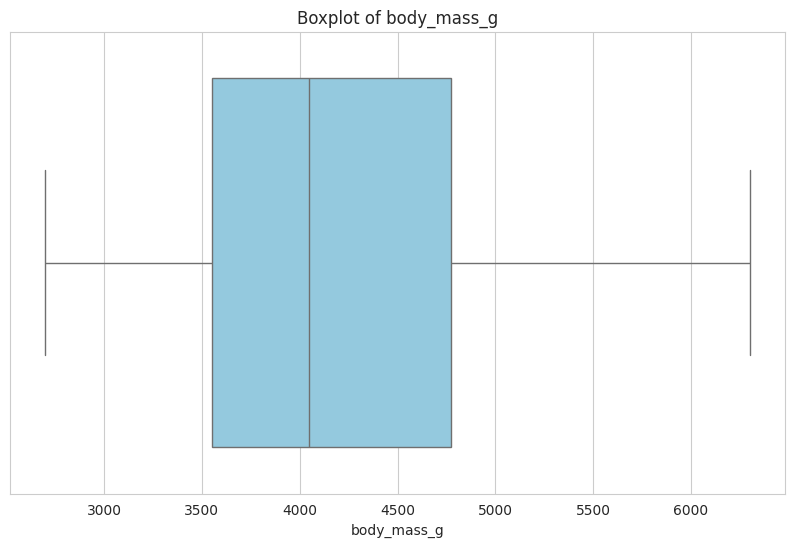

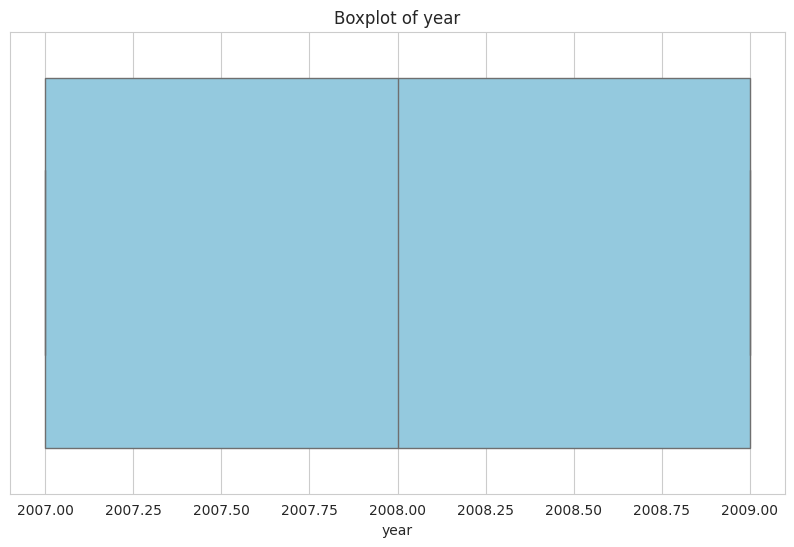

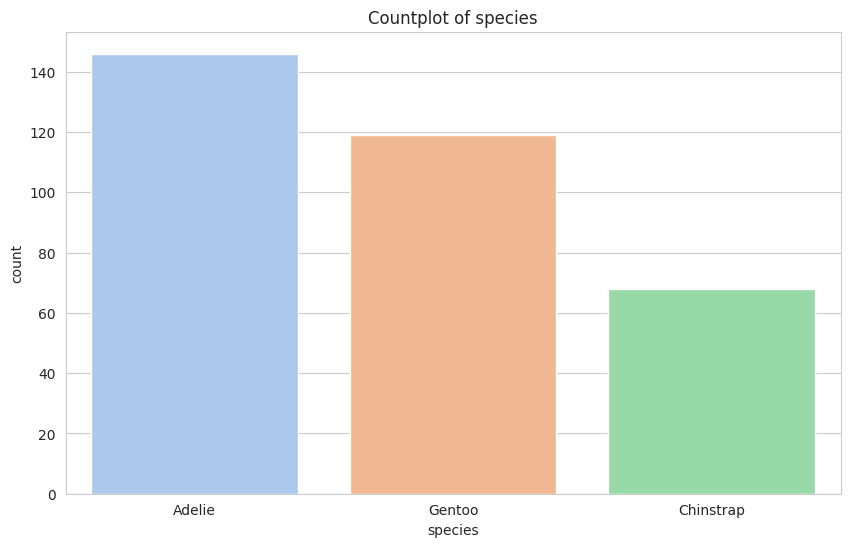

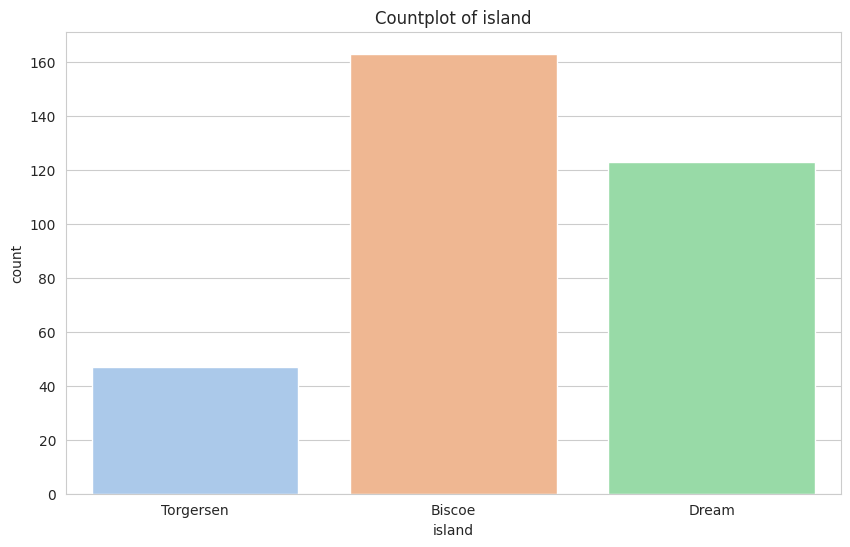

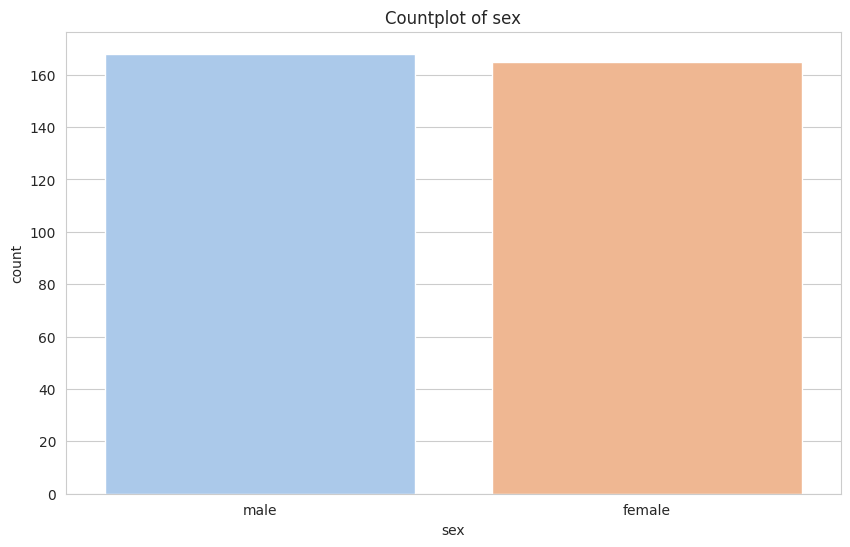

In [ ]:
#  Univariate Analysis
# Histograms for numeric columns
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numeric Columns", fontsize=16)
plt.show()

# Boxplots for numeric columns
for col in df.select_dtypes(include=np.number):
    sns.boxplot(x=df[col], hue=None, color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

# Countplots for categorical columns
for col in df.select_dtypes(include='object'):
    sns.countplot(x=col, hue=None, data=df, palette="pastel")
    plt.title(f"Countplot of {col}")
    plt.show()

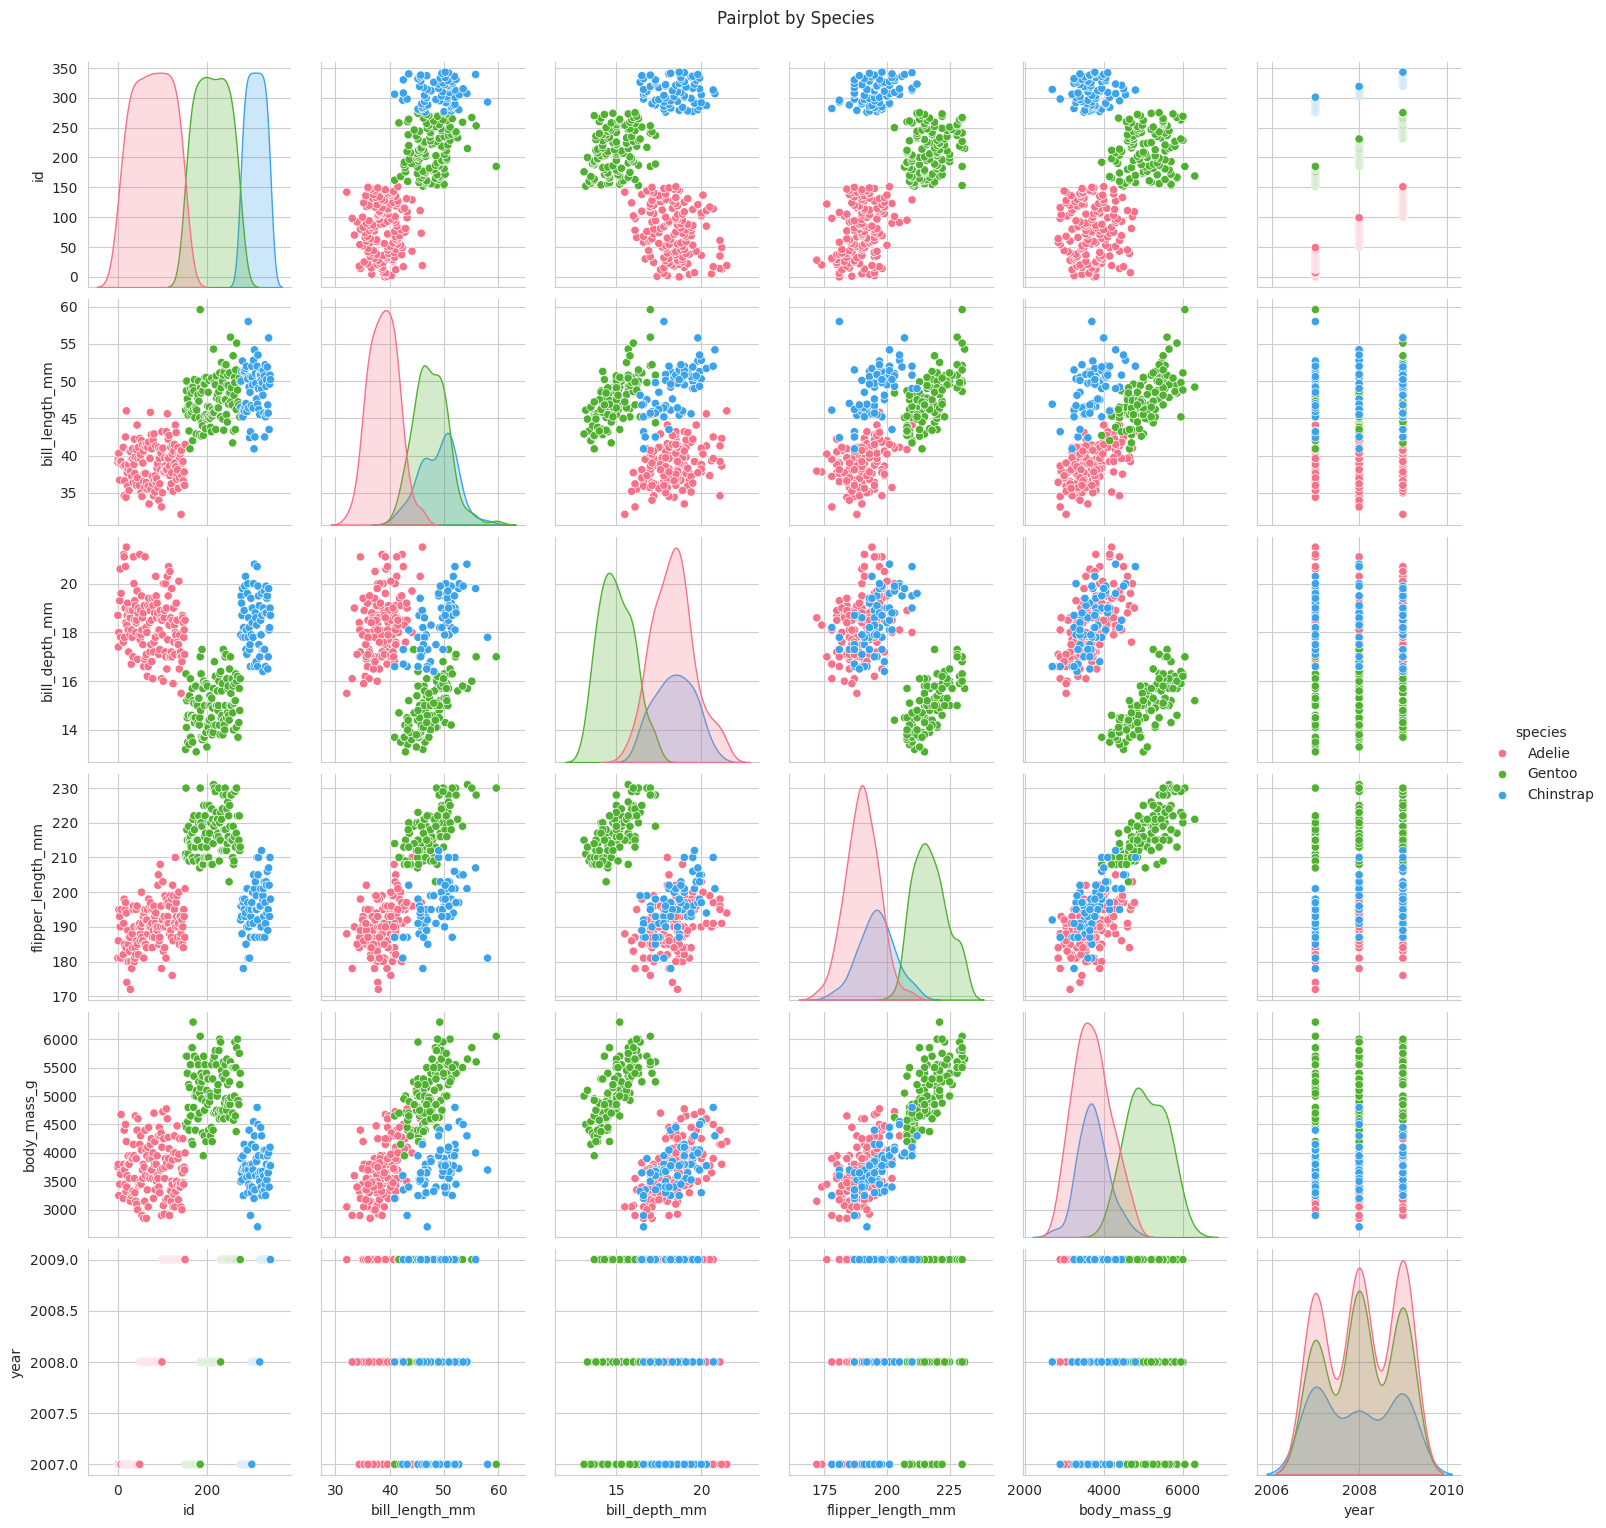

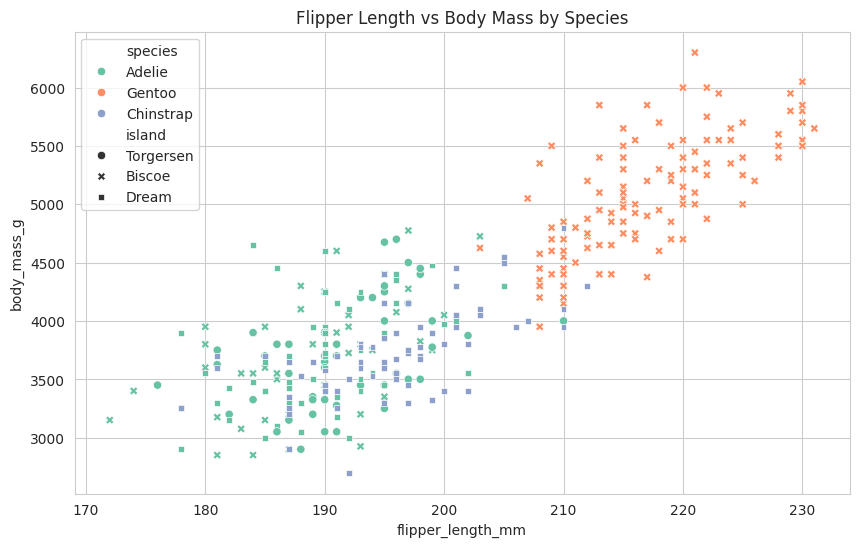


--- Mean values grouped by Species ---
                   id  bill_length_mm  bill_depth_mm  flipper_length_mm  \
species                                                                   
Adelie      78.000000       38.823973      18.347260         190.102740   
Chinstrap  309.500000       48.833824      18.420588         195.823529   
Gentoo     212.462185       47.568067      14.996639         217.235294   

           body_mass_g         year  
species                              
Adelie     3706.164384  2008.054795  
Chinstrap  3733.088235  2007.970588  
Gentoo     5092.436975  2008.067227  


In [ ]:
# Bivariate Analysis
# Pairplot
sns.pairplot(df, hue="species", palette="husl")
plt.suptitle("Pairplot by Species", y=1.02)
plt.show()

# Scatterplot: flipper length vs body mass
sns.scatterplot(
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    style="island",
    data=df,
    palette="Set2"
)
plt.title("Flipper Length vs Body Mass by Species")
plt.show()

# Group statistics by species
print("\n--- Mean values grouped by Species ---")
print(df.groupby("species").mean(numeric_only=True))


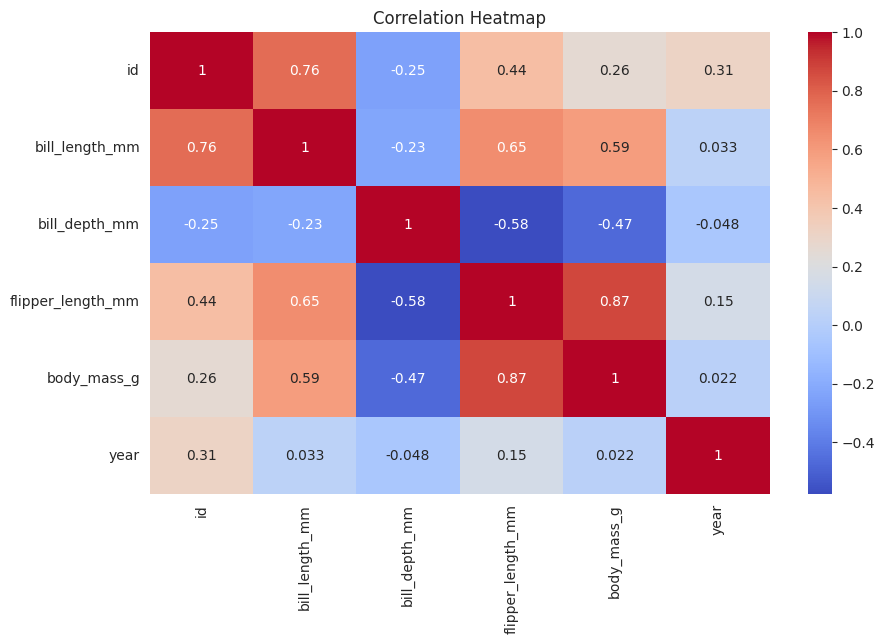

In [ ]:
#  Correlation Analysis
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#  Observations
print("""
==========================
OBSERVATIONS
==========================
1. Histogram: Body mass, flipper length, and bill length show distinct peaks for different species. Gentoo penguins cluster at higher body mass values (~5,000 g).
2. Boxplots: Adelie species have a smaller range in body mass and flipper length compared to Gentoo. Some outliers exist in body mass for Chinstrap.
3. Countplots: Adelie penguins are the most represented species, with balanced gender distribution except for some missing gender data.
4. Pairplot: Flipper length and body mass have a strong positive relationship, especially within species clusters.
5. Scatterplot: Gentoo species clearly separate from Adelie and Chinstrap in both metrics, forming a distinct cluster.
6. Heatmap: Flipper length and body mass have the highest positive correlation (~0.87). Bill length and bill depth have a moderate negative correlation.
""")



OBSERVATIONS
1. Histogram: Body mass, flipper length, and bill length show distinct peaks for different species. Gentoo penguins cluster at higher body mass values (~5,000 g).
2. Boxplots: Adelie species have a smaller range in body mass and flipper length compared to Gentoo. Some outliers exist in body mass for Chinstrap.
3. Countplots: Adelie penguins are the most represented species, with balanced gender distribution except for some missing gender data.
4. Pairplot: Flipper length and body mass have a strong positive relationship, especially within species clusters.
5. Scatterplot: Gentoo species clearly separate from Adelie and Chinstrap in both metrics, forming a distinct cluster.
6. Heatmap: Flipper length and body mass have the highest positive correlation (~0.87). Bill length and bill depth have a moderate negative correlation.



In [ ]:


#  Summary
print("""
==========================
SUMMARY OF FINDINGS
==========================
- The dataset contains three main species (Adelie, Chinstrap, Gentoo) with varying body sizes and morphological characteristics.
- Gentoo penguins are significantly larger in both body mass and flipper length compared to the other species.
- Adelie penguins are the smallest in overall size but have a relatively consistent body structure.
- Strong correlation exists between flipper length and body mass across all species, suggesting a proportional relationship.
- Gender distribution is fairly balanced, though some missing values exist.
- Potential outliers in Chinstrap body mass may require further investigation.
""")


SUMMARY OF FINDINGS
- The dataset contains three main species (Adelie, Chinstrap, Gentoo) with varying body sizes and morphological characteristics.
- Gentoo penguins are significantly larger in both body mass and flipper length compared to the other species.
- Adelie penguins are the smallest in overall size but have a relatively consistent body structure.
- Strong correlation exists between flipper length and body mass across all species, suggesting a proportional relationship.
- Gender distribution is fairly balanced, though some missing values exist.
- Potential outliers in Chinstrap body mass may require further investigation.

